<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/Team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
train.head()

num      date_time  전력사용량(kWh)  기온(°C)  ...  강수량(mm)  일조(hr)  비전기냉방설비운영  태양광보유
0    1  2020-06-01 00    8179.056    17.6  ...      0.8     0.0        0.0    0.0
1    1  2020-06-01 01    8135.640    17.7  ...      0.3     0.0        0.0    0.0
2    1  2020-06-01 02    8107.128    17.5  ...      0.0     0.0        0.0    0.0
3    1  2020-06-01 03    8048.808    17.1  ...      0.0     0.0        0.0    0.0
4    1  2020-06-01 04    8043.624    17.0  ...      0.0     0.0        0.0    0.0

[5 rows x 10 columns]

* num : 건물번호
* date_time : 시간

In [90]:
train.columns = ['num','datetime','usage','temperature','windspeed','humidity','precipitation','sunshine','nelec_cool_flag','solar_flag']

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   num              122400 non-null  int64  
 1   datetime         122400 non-null  object 
 2   usage            122400 non-null  float64
 3   temperature      122400 non-null  float64
 4   windspeed        122400 non-null  float64
 5   humidity         122400 non-null  float64
 6   precipitation    122400 non-null  float64
 7   sunshine         122400 non-null  float64
 8   nelec_cool_flag  122400 non-null  float64
 9   solar_flag       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [93]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import *
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [94]:
eda_df = train.copy()

In [95]:
# adding features related to datetime
eda_df['datetime'] = pd.to_datetime(eda_df['datetime'])
eda_df['hour'] = eda_df['datetime'].dt.hour
eda_df['weekday'] = eda_df['datetime'].dt.weekday
eda_df['date'] = eda_df['datetime'].dt.date
eda_df['day'] = eda_df['datetime'].dt.day
eda_df['month'] = eda_df['datetime'].dt.month
eda_df['weekend'] = eda_df['weekday'].isin([5,6]).astype(int)

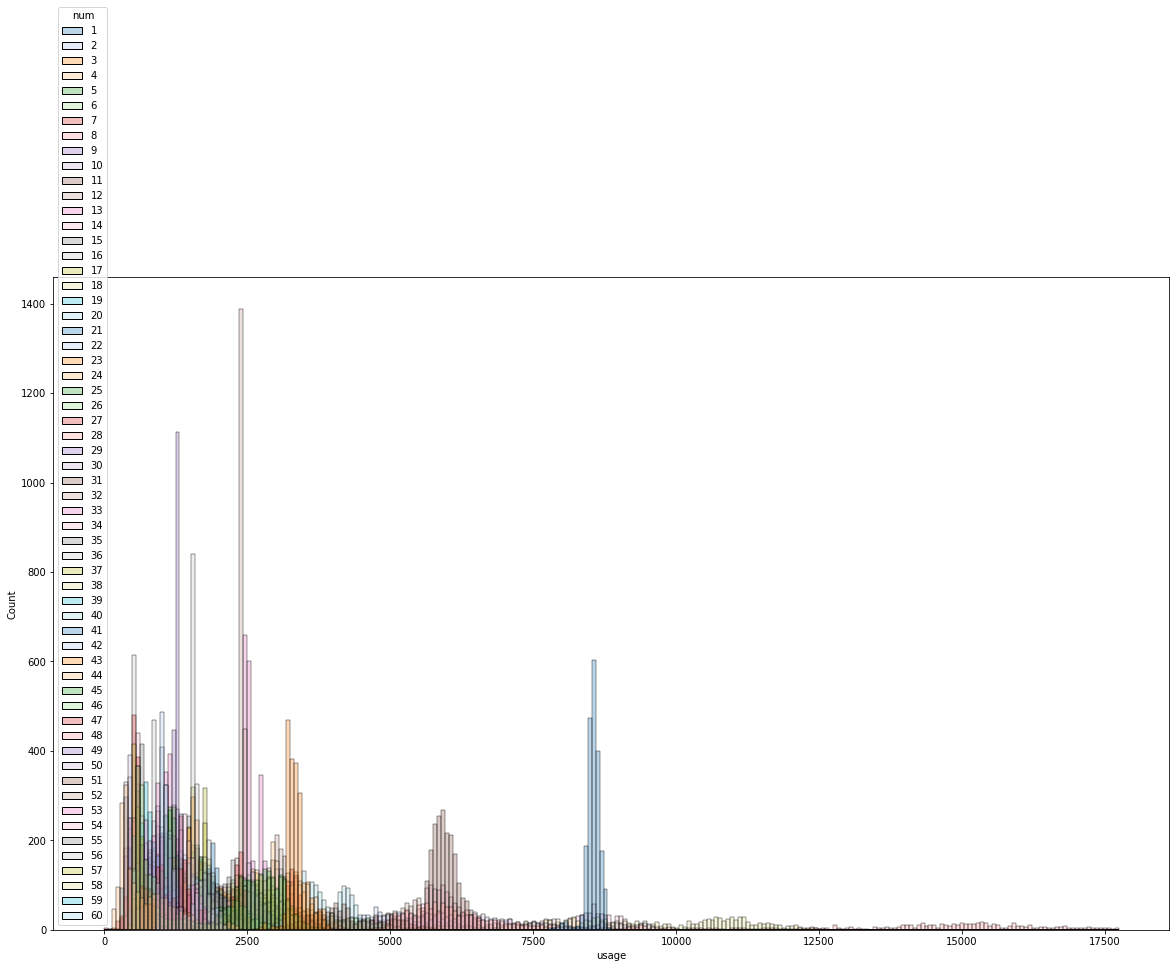

In [78]:
fig = plt.figure(figsize = (20, 12))
sns.histplot(data=eda_df, x='usage', hue = 'num', alpha = 0.3, palette = 'tab20')

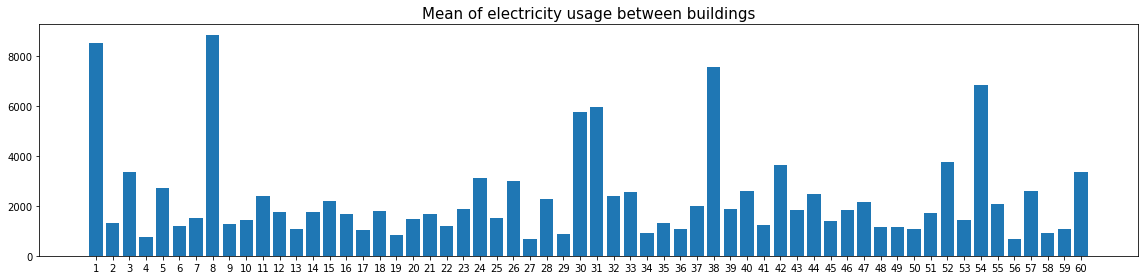

In [79]:
usage_summary = eda_df.pivot_table(values = 'usage', index = 'num', aggfunc = np.mean)  # index 항목별 values의 aggfunc을 계산(num 항목별 usage의 평균을 계산)

plt.figure(figsize = (16, 4))
plt.bar(usage_summary.index, usage_summary.usage)
plt.title('Mean of electricity usage between buildings', fontsize = 15)
plt.xticks(list(range(1,61)))
plt.tight_layout()
plt.show()

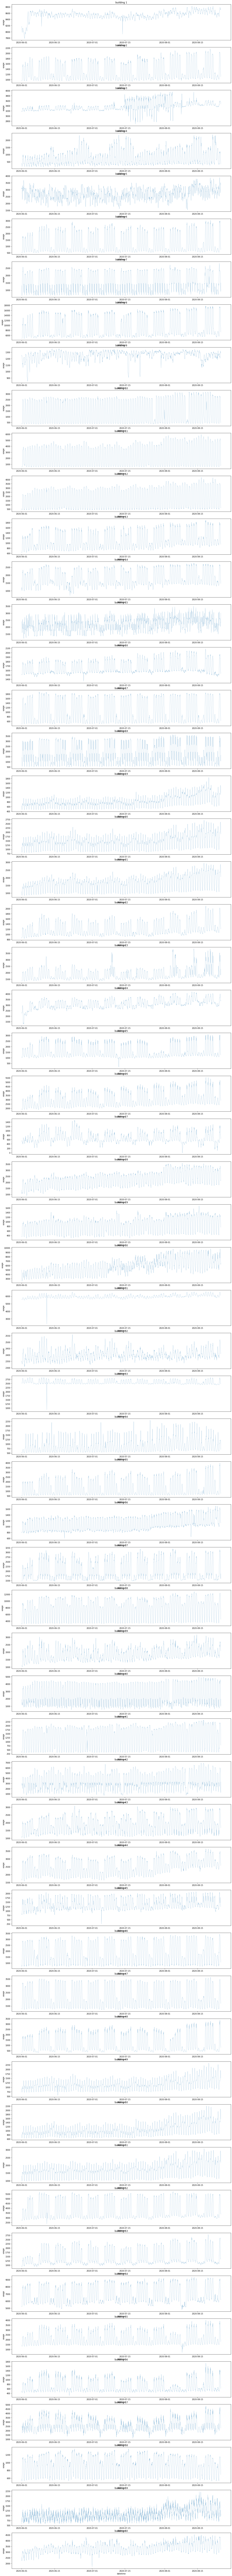

In [81]:
fig = plt.figure(figsize = (20, 240))
for i in eda_df['num'].unique():
    num_i = eda_df[eda_df.num == i]
    plt.subplot(60, 1, i)
    sns.lineplot(data = num_i, x = 'datetime', y = 'usage', linewidth = 0.3)
    plt.title(f'building {i}')

In [84]:
num_1 = train[train.num == 1]
building_1_corr = num_1.corr().iloc[1:7, 1:7]
building_1_corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

* 상관분석  
https://blog.naver.com/wtracer/221738979637

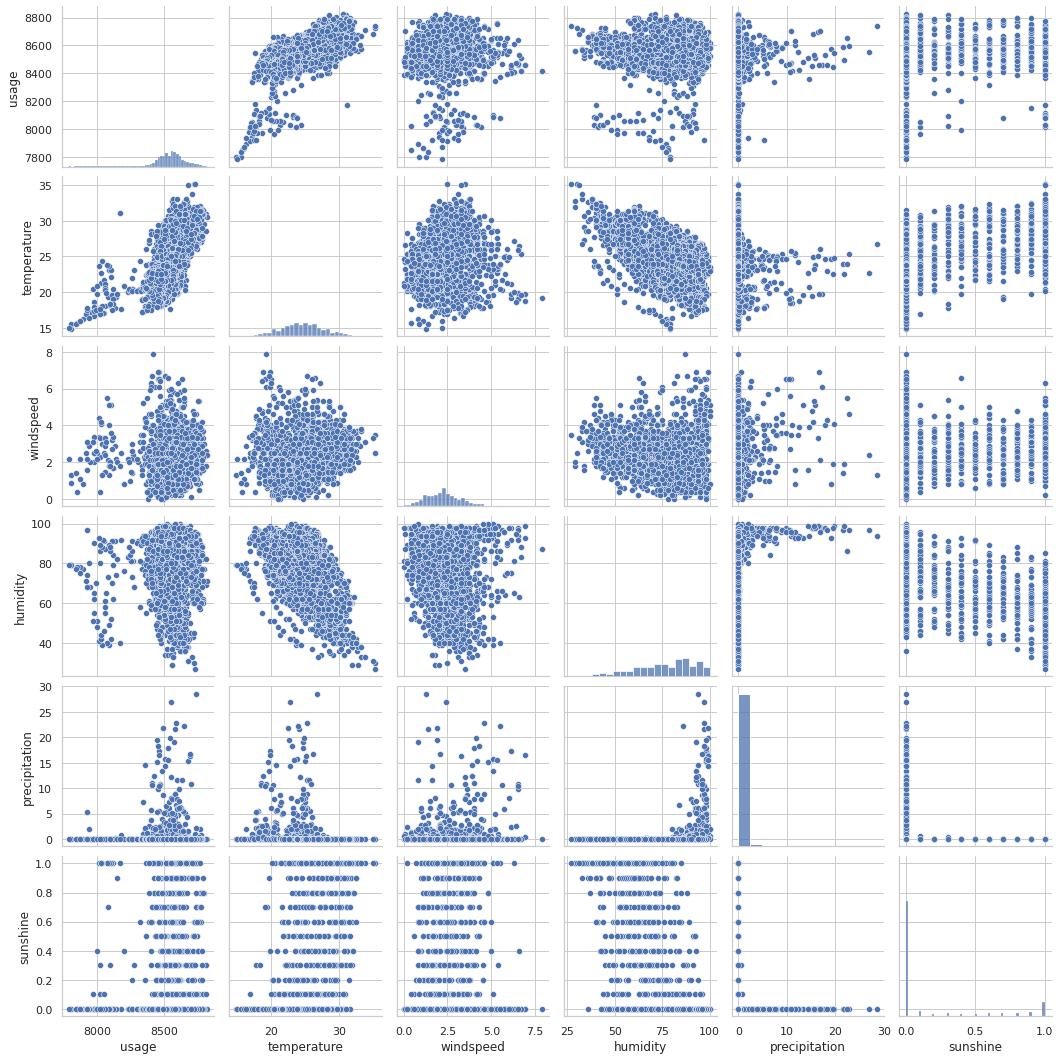

In [86]:
import seaborn as sns

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(num_1[['usage', 'temperature', 'windspeed', 'humidity', 'precipitation', 'sunshine']], height = 2.5)
plt.show()

* 상관분석 시각화  
https://blog.naver.com/sjy5448/222293781089

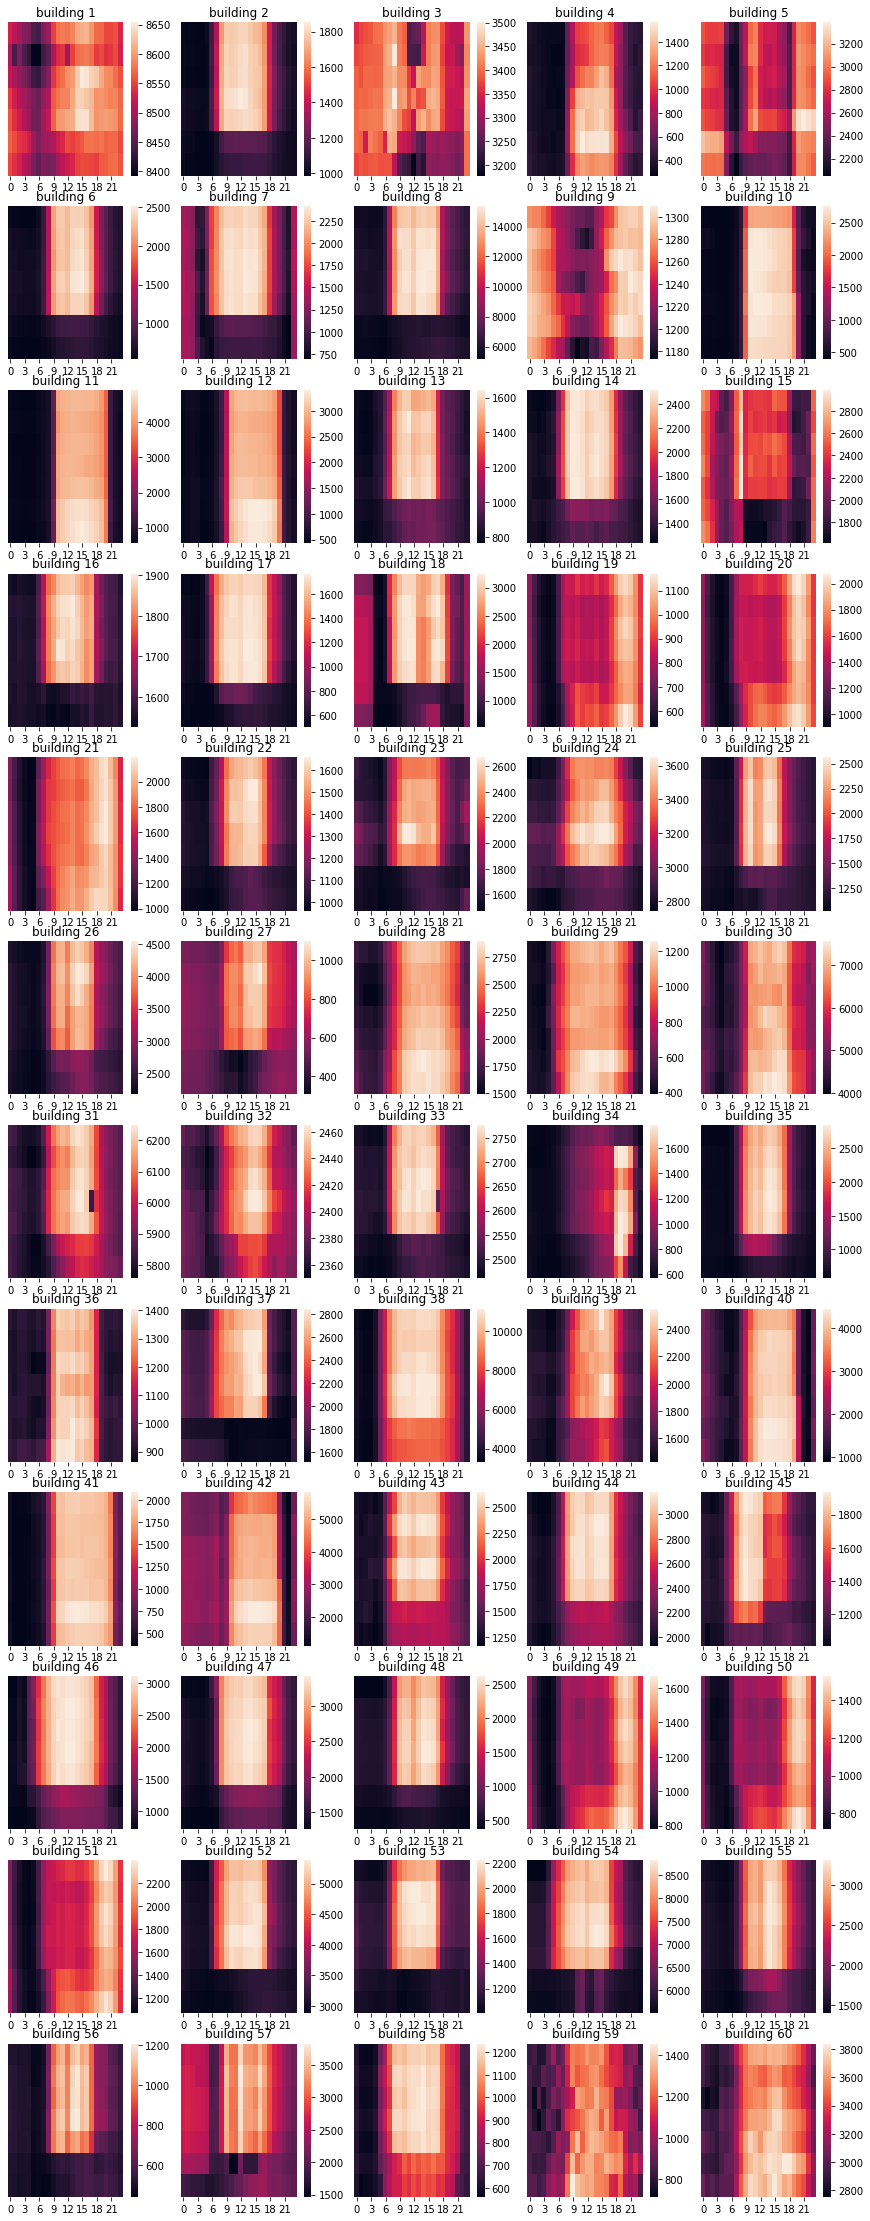

In [80]:
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for num in eda_df['num'].unique():
    df = eda_df[eda_df.num == num]
    df = df.groupby(['weekday', 'hour'])['usage'].mean().reset_index().pivot('weekday', 'hour', 'usage')
    plt.subplot(12, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

In [4]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
test.head(15)

num      date_time  기온(°C)  ...  일조(hr, 3시간)  비전기냉방설비운영  태양광보유
0     1  2020-08-25 00    27.8  ...          0.0        NaN    NaN
1     1  2020-08-25 01     NaN  ...          NaN        NaN    NaN
2     1  2020-08-25 02     NaN  ...          NaN        NaN    NaN
3     1  2020-08-25 03    27.3  ...          0.0        NaN    NaN
4     1  2020-08-25 04     NaN  ...          NaN        NaN    NaN
5     1  2020-08-25 05     NaN  ...          NaN        NaN    NaN
6     1  2020-08-25 06    26.1  ...          0.0        NaN    NaN
7     1  2020-08-25 07     NaN  ...          NaN        NaN    NaN
8     1  2020-08-25 08     NaN  ...          NaN        NaN    NaN
9     1  2020-08-25 09    28.8  ...          1.1        NaN    NaN
10    1  2020-08-25 10     NaN  ...          NaN        NaN    NaN
11    1  2020-08-25 11     NaN  ...          NaN        NaN    NaN
12    1  2020-08-25 12    32.7  ...          3.0        NaN    NaN
13    1  2020-08-25 13     NaN  ...          NaN        NaN    NaN
14    1  2020-08-25 14     NaN  ...          NaN        NaN    NaN

[15 rows x 9 columns]

In [6]:
test.info()  # test 데이터의 행과 열의 구성 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB
